In [1]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import torch
import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance
from models.diffusion import *

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model_type = 'diff'
fname = 'v1'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

/tmp/ipykernel_2559423/1524880275.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1.1*train_loss_list[0])


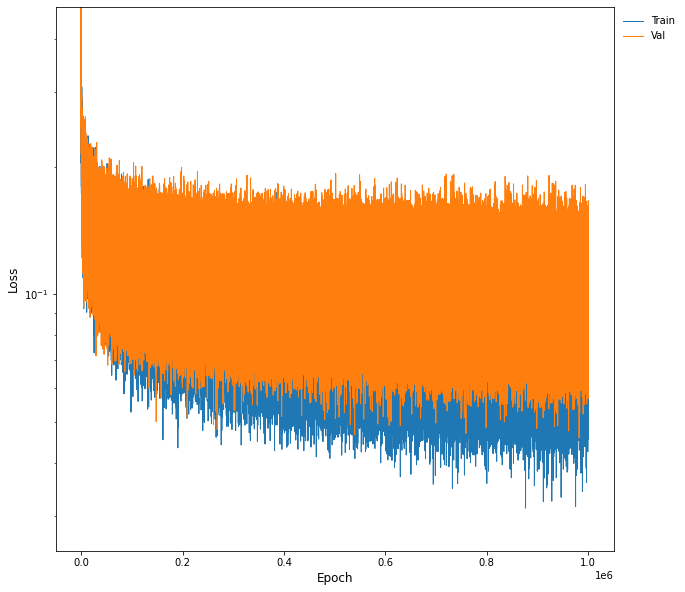

In [4]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(train_loss_list)), train_loss_list, label = 'Train')
plt.plot(range(len(val_loss_list)), val_loss_list, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0,1.1*train_loss_list[0])
plt.show()

In [5]:
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs, cond_scale=1)
mmd_zeo_agg_df, wsd_zeo_agg_df = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs)
mmd_zeo_osda_df, wsd_zeo_osda_df = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...
Calculating metrics for zeolite-aggregated systems...
Mean MMD: 1.8627186646828284
Mean WSD: 0.5070264028252687
Calculating metrics for zeolite-OSDA systems...
Mean MMD: 2.1712865073193788
Mean WSD: 0.4699003870321746


# 1) Overall aggregated

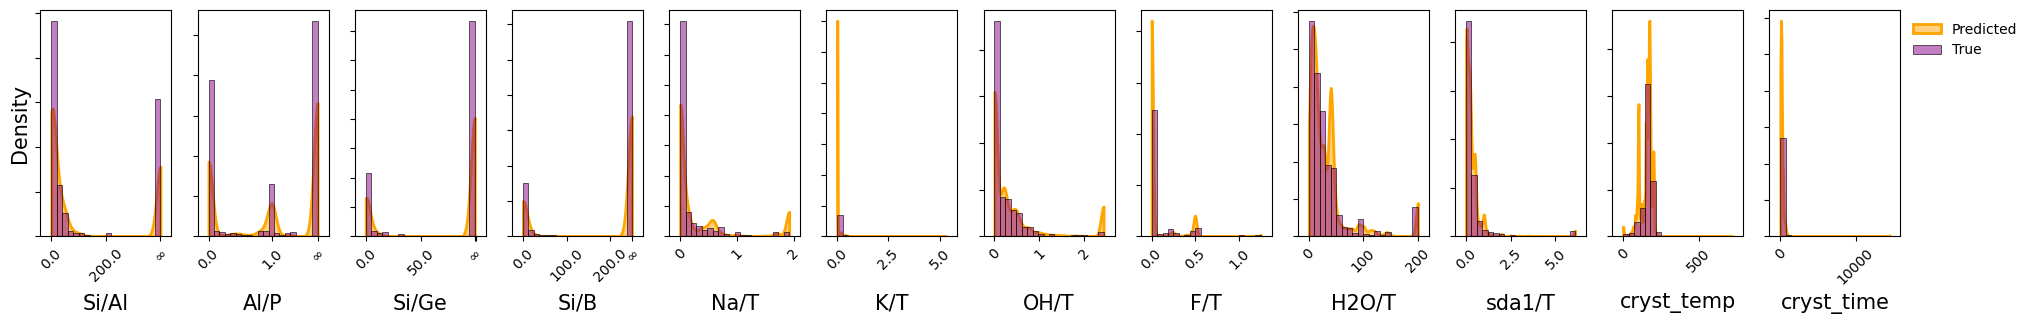

In [7]:
utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [True, False], [False, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5)

# 2) System-splits

### A) Zeolite-aggregated systems

Calculating metrics for zeolite-aggregated systems...
CHA


MMD: 0.3386220932006836
WSD: 0.0948450222222337


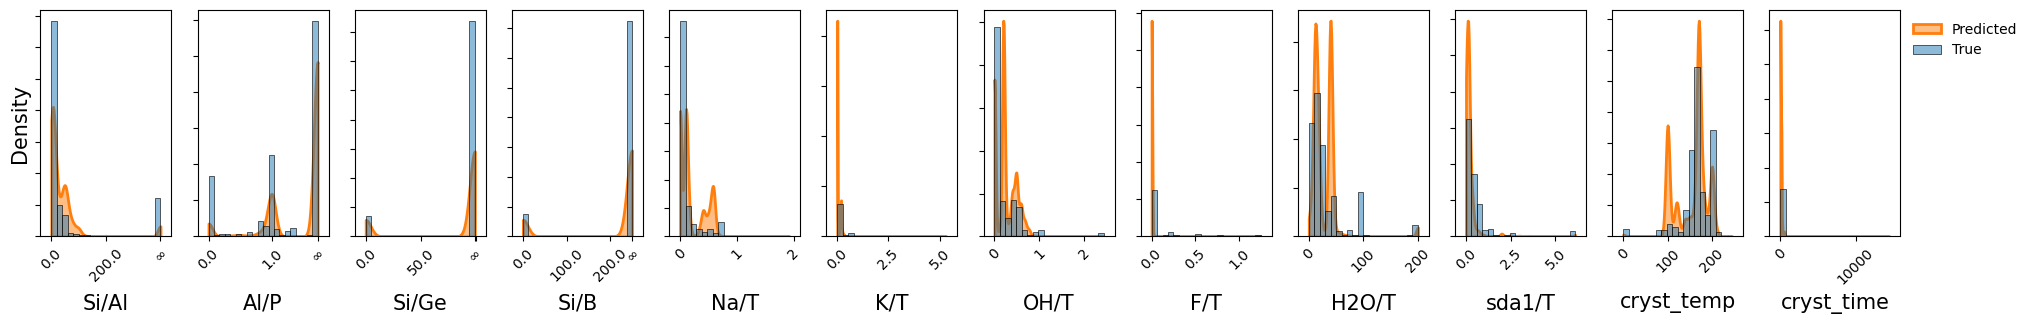

AEL
MMD: 1.188796043395996
WSD: 0.3064060400983838


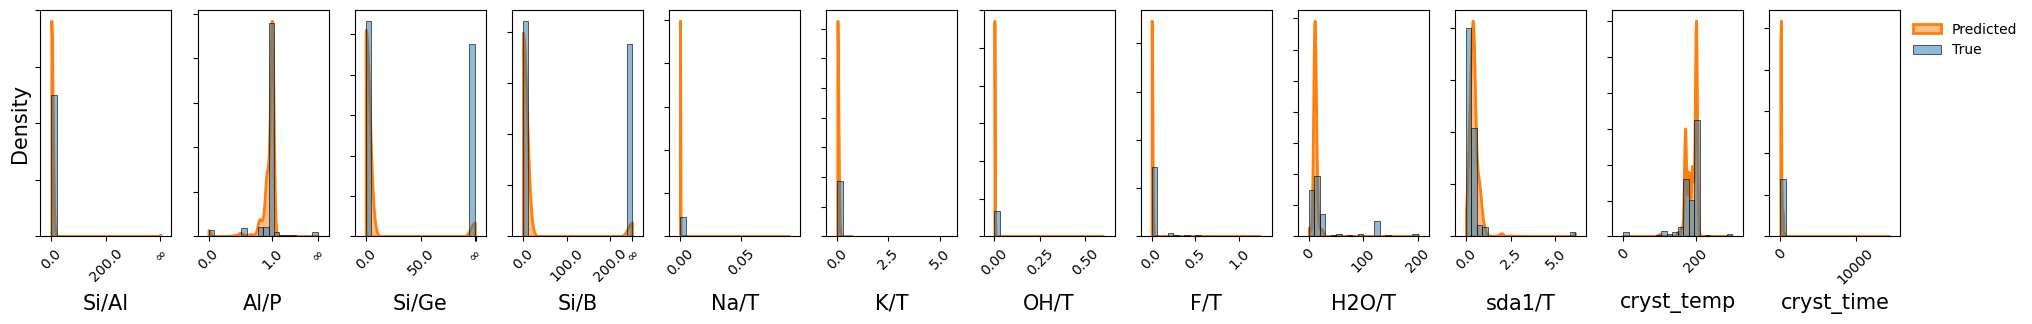

MFI
MMD: 0.13842105865478516
WSD: 0.026251742333500656


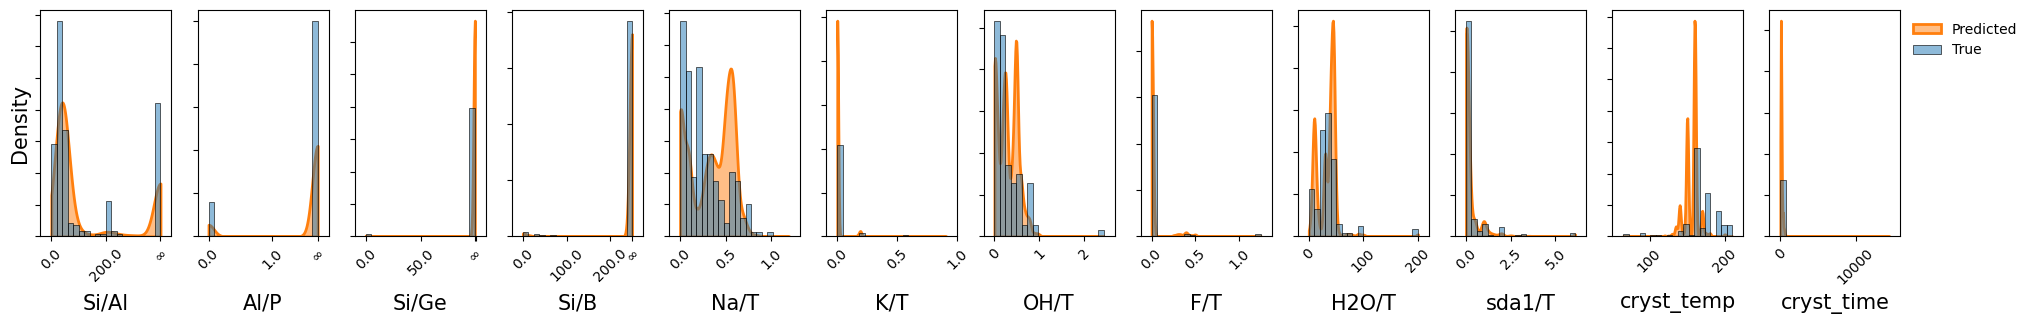

LTA
MMD: 0.425656795501709
WSD: 0.15070182674907548


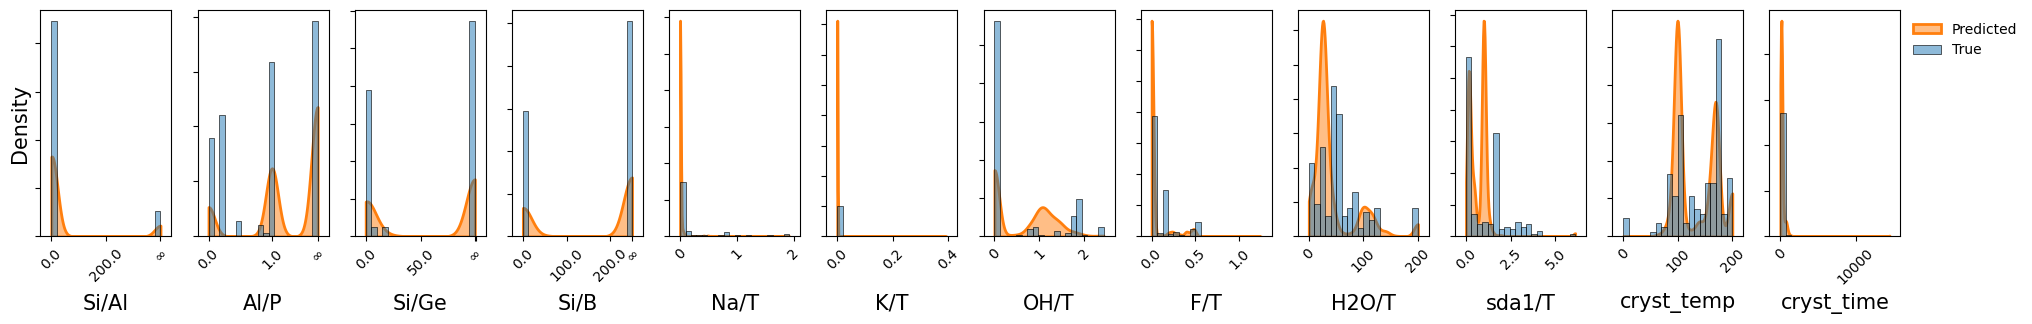

AFI
MMD: 0.20375919342041016
WSD: 0.1047167842818172


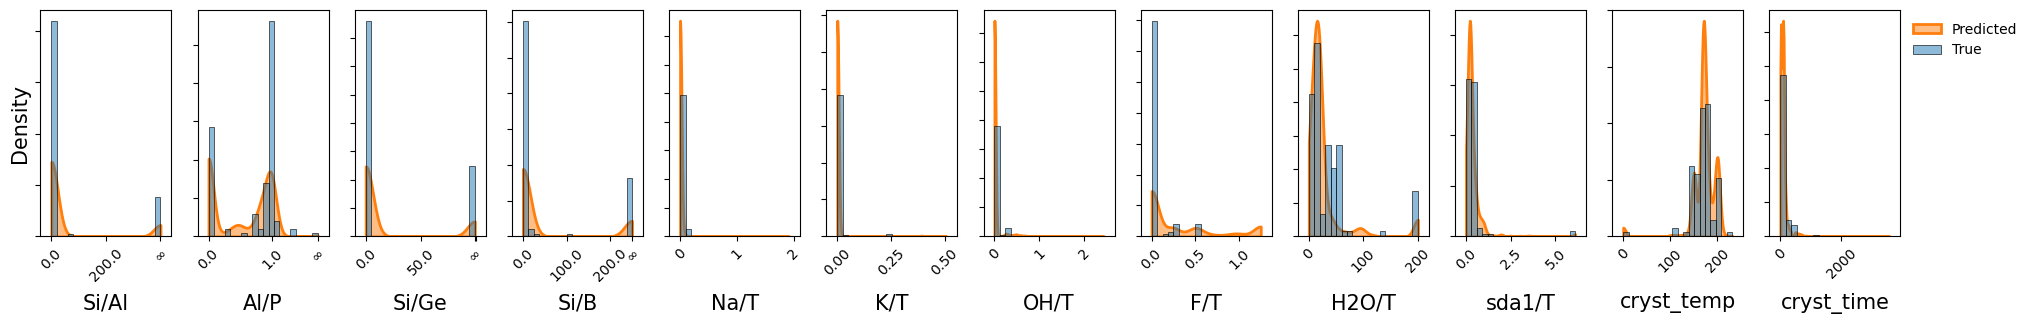

IWR
MMD: 0.5554304122924805
WSD: 0.16800205136338958


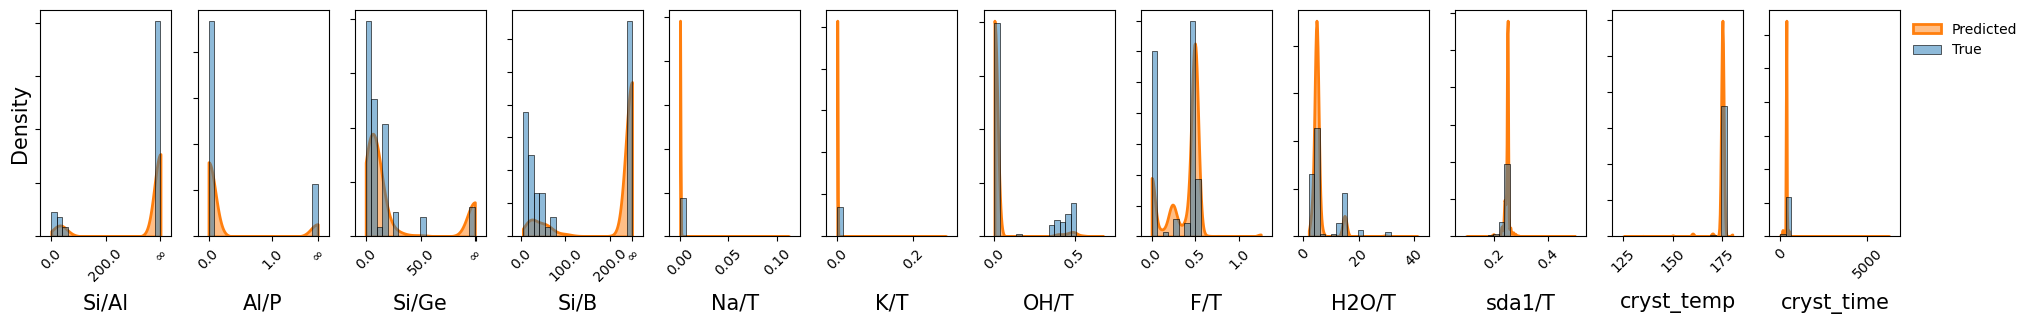

BEA
MMD: 0.09996891021728516
WSD: 0.03847465531946615


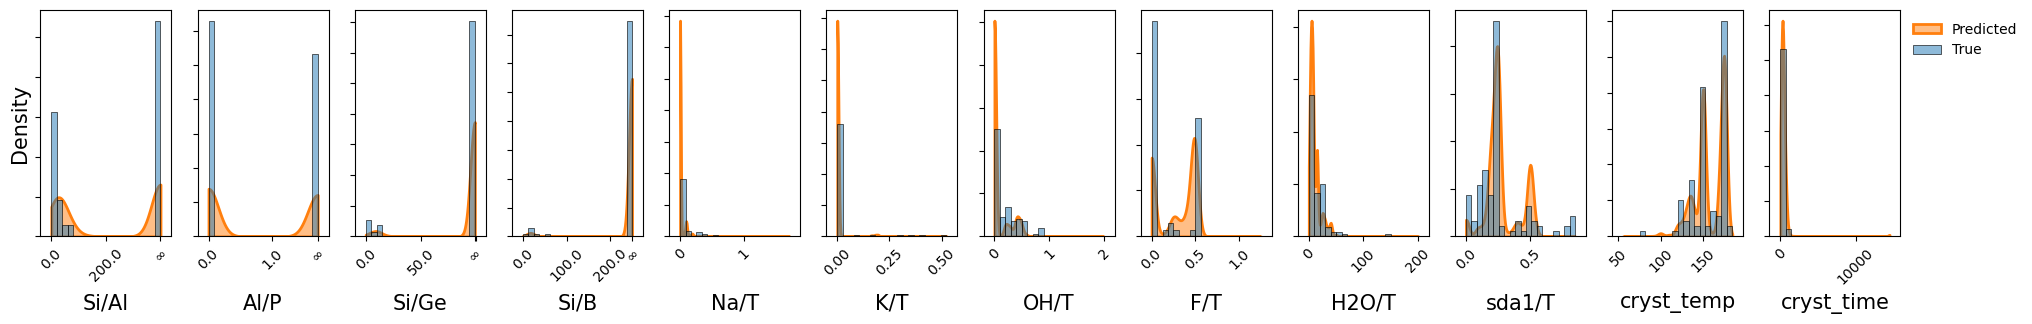

MTW
MMD: 0.1530132293701172
WSD: 0.05024246800036651


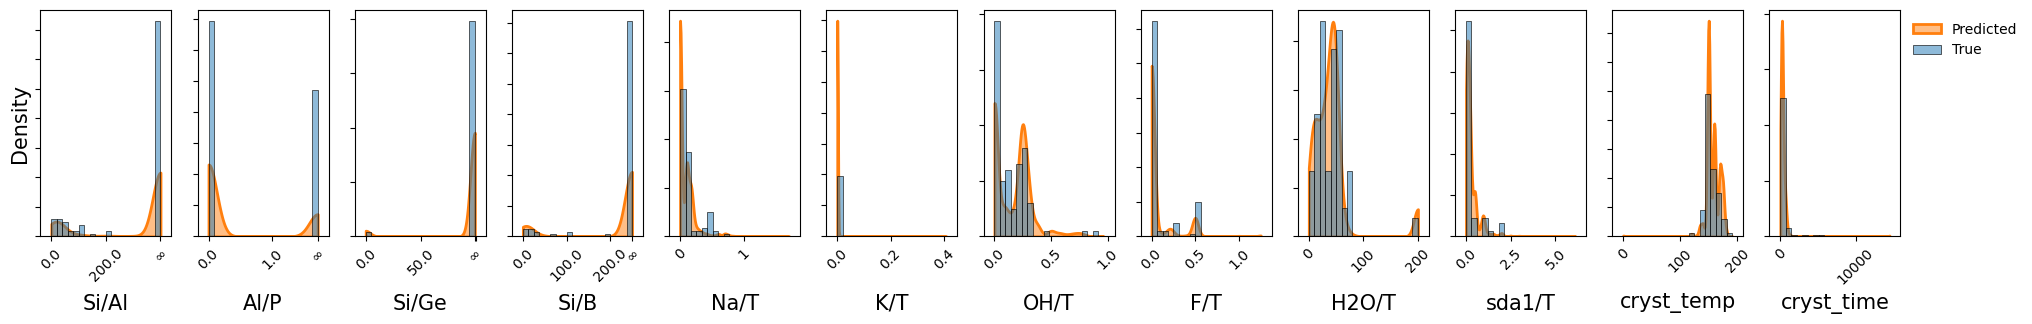

MEL
MMD: 0.808929443359375
WSD: 0.2901406314117103


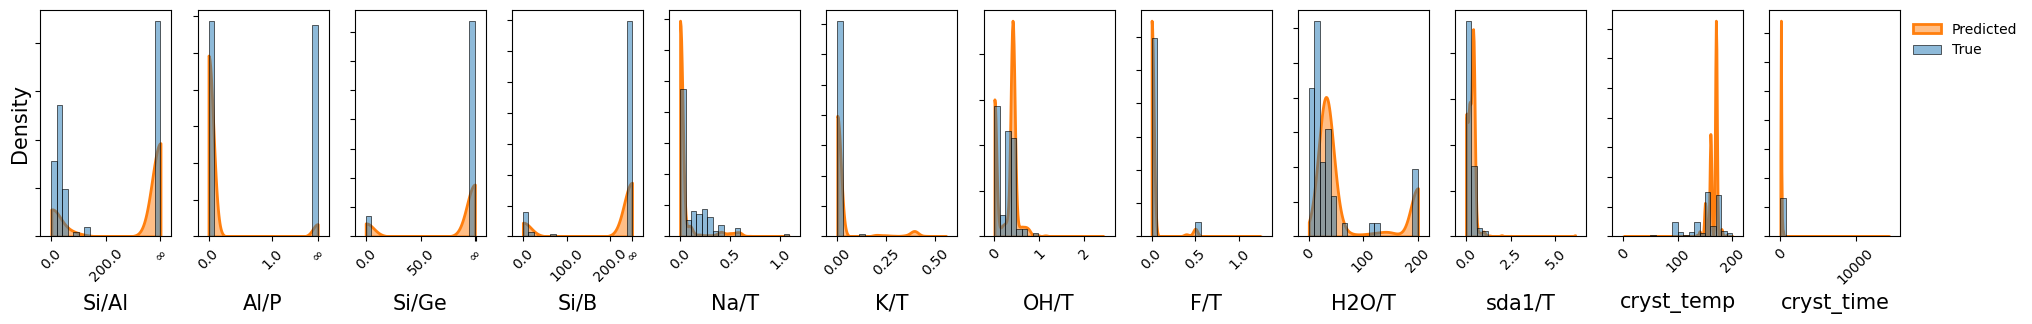

LEV
MMD: 0.27584362030029297
WSD: 0.12419903228397147


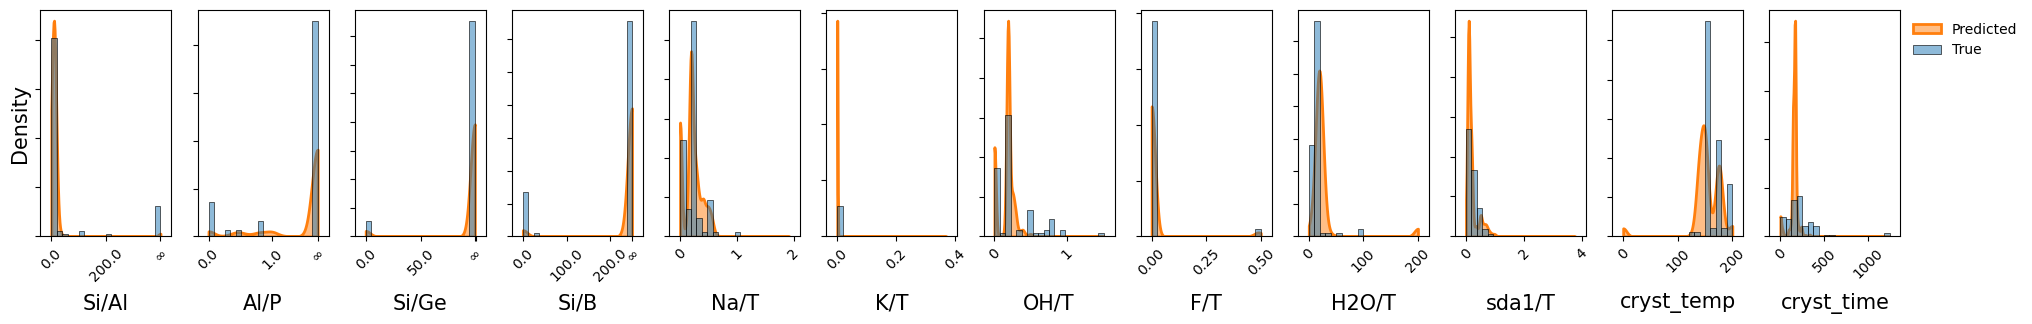

Mean MMD: 0.41884407997131345
Mean WSD: 0.13539802540639148


In [8]:
_, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

SAV
MMD: 2.0817151069641113
WSD: 0.8163403884128347


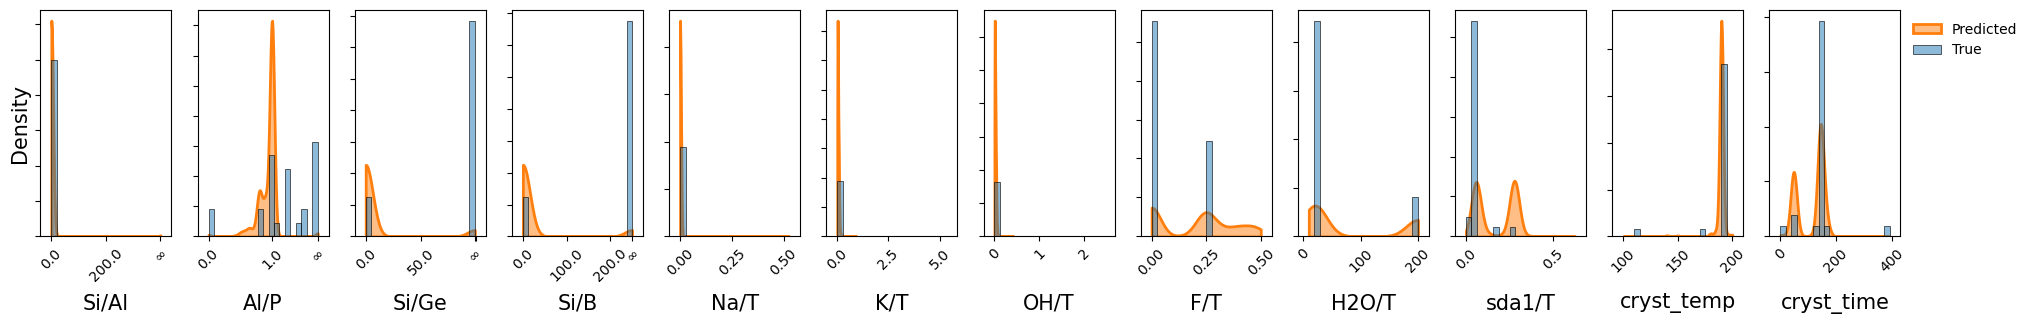

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 0.054706573486328125
WSD: 0.020631404345344103


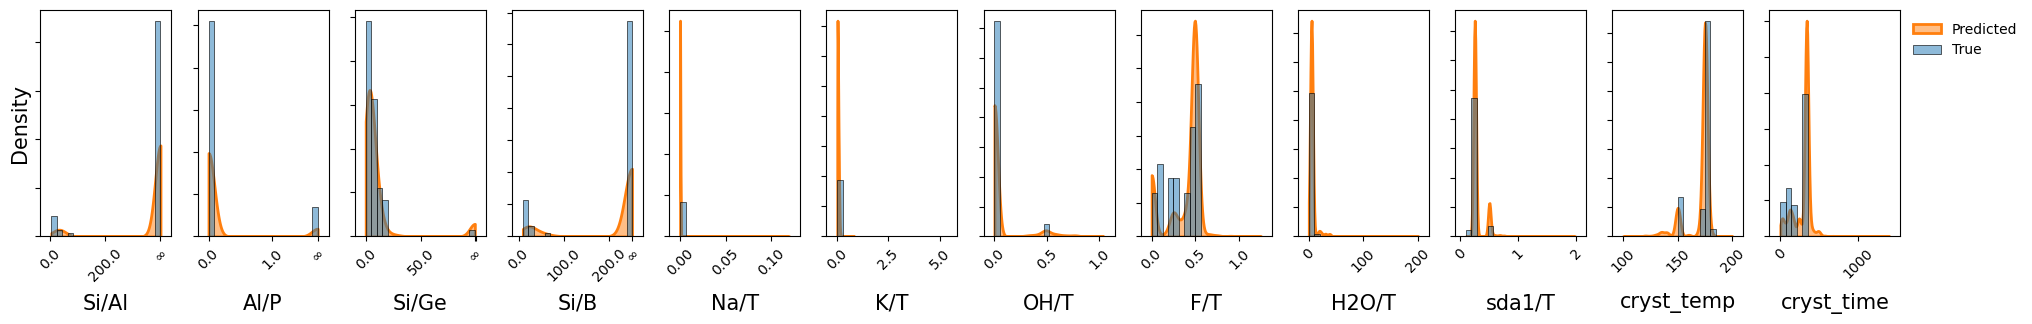

In [10]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 1.1972627639770508
WSD: 0.2987743059158537


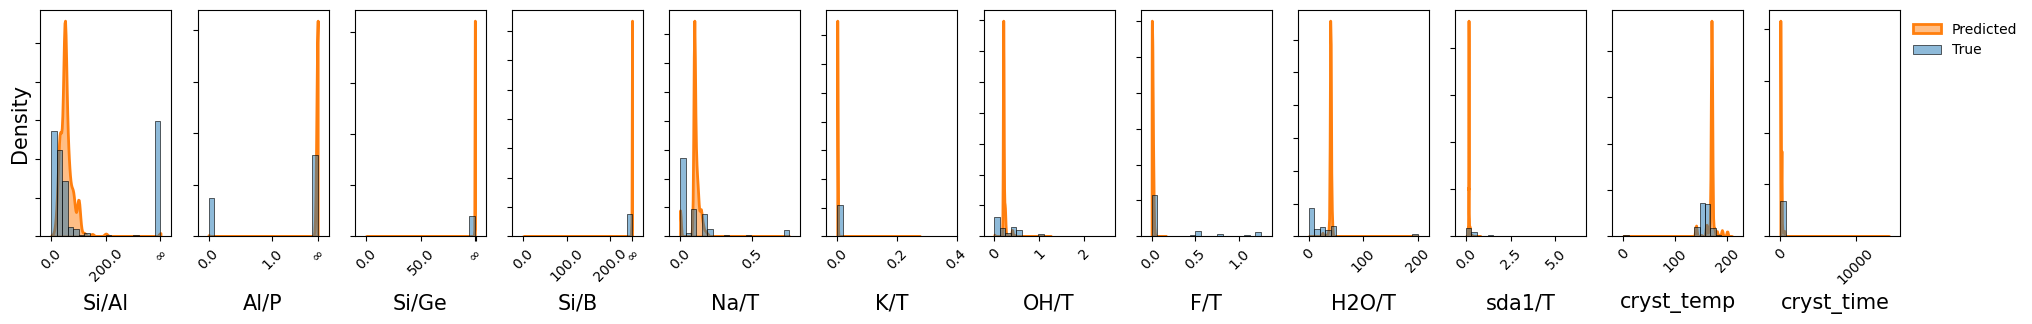

AEL CCCNCCC
MMD: 1.327920913696289
WSD: 0.3401971487012297


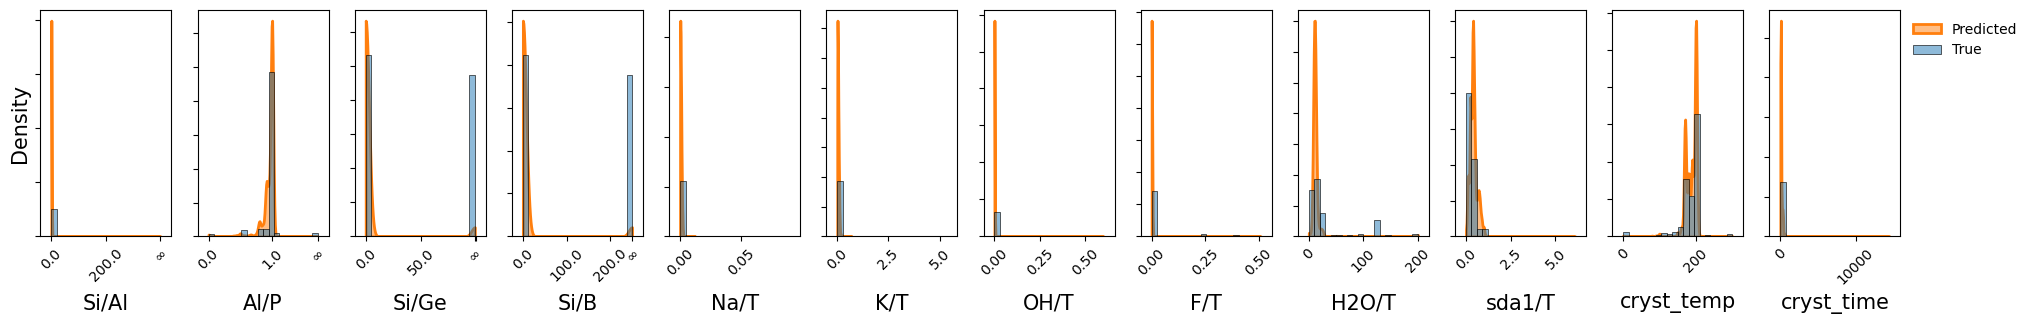

CHA OSDA-free
MMD: 1.0506505966186523
WSD: 0.12325193967392988


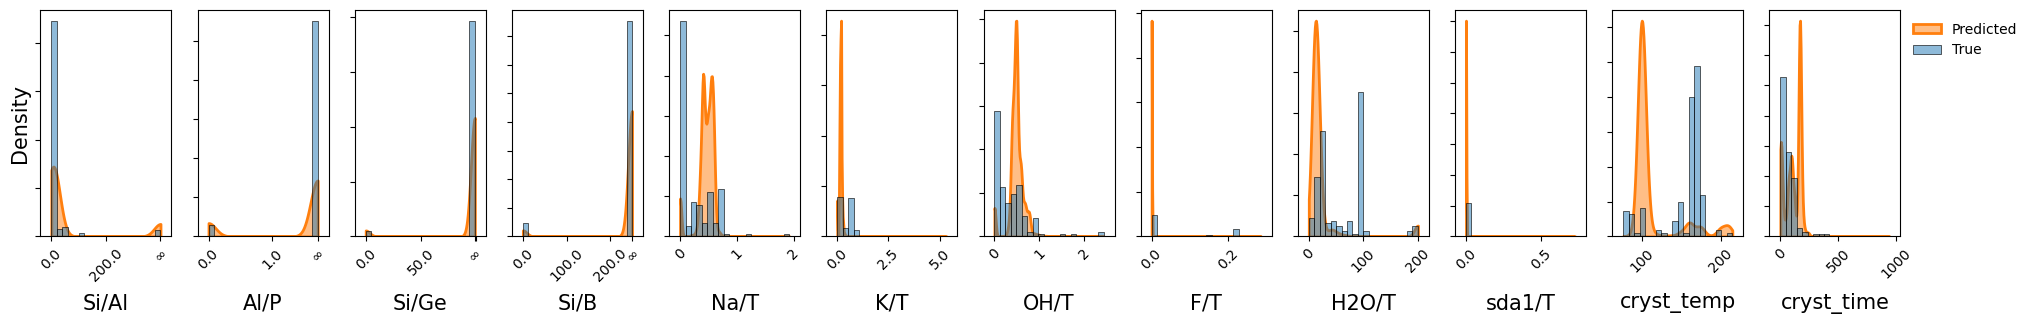

MFI OSDA-free
MMD: 0.4357109069824219
WSD: 0.047703861414584416


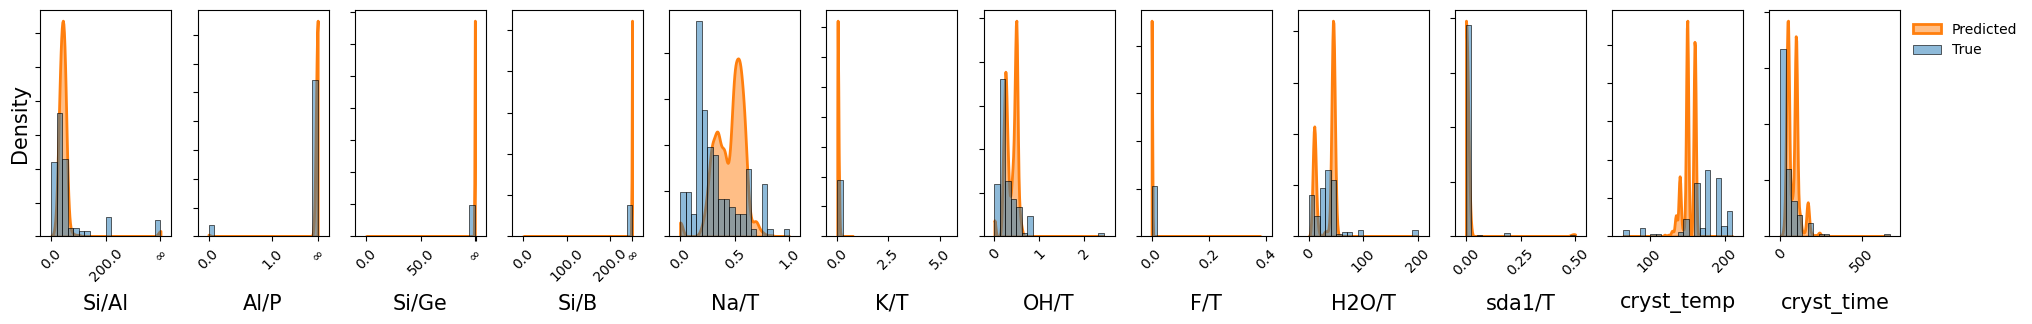

CHA CCN(CC)CC
MMD: 2.3454065322875977
WSD: 0.674735315149269


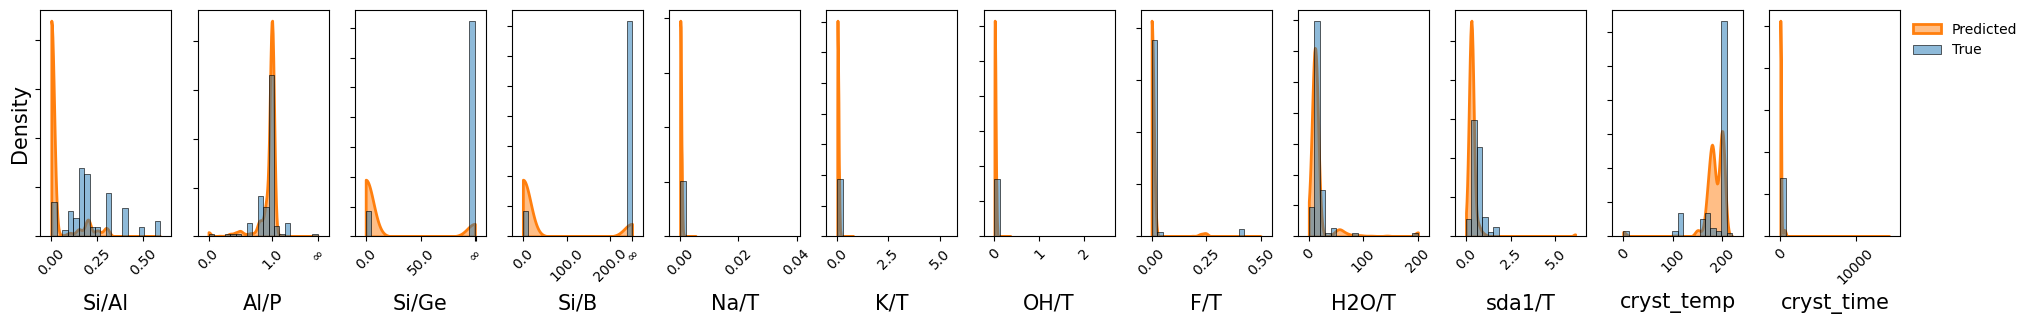

LTA C[N+](C)(C)C
MMD: 1.2140007019042969
WSD: 0.2985969448563134


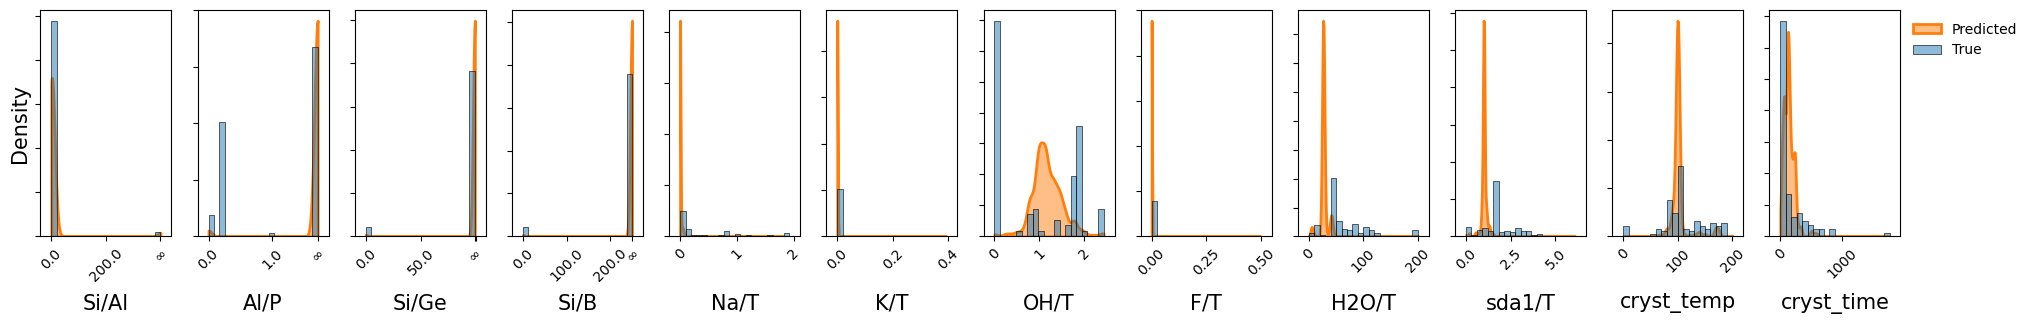

MEL CCCC[N+](CCCC)(CCCC)CCCC
MMD: 1.1502008438110352
WSD: 0.5297046074943357


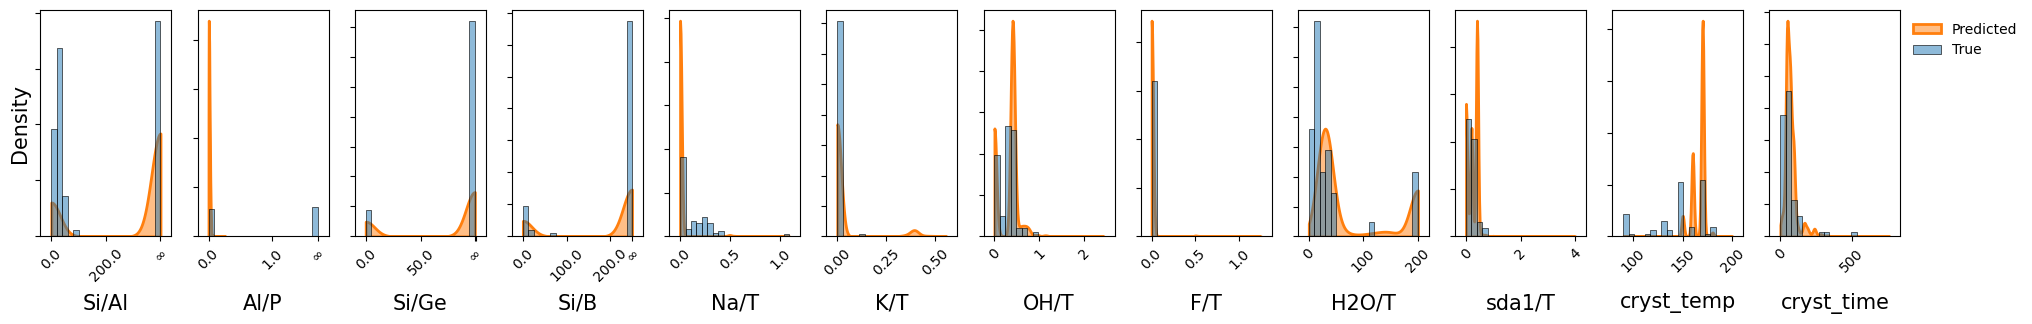

CHA C1COCCN1
MMD: 1.8187036514282227
WSD: 0.3777895334883218


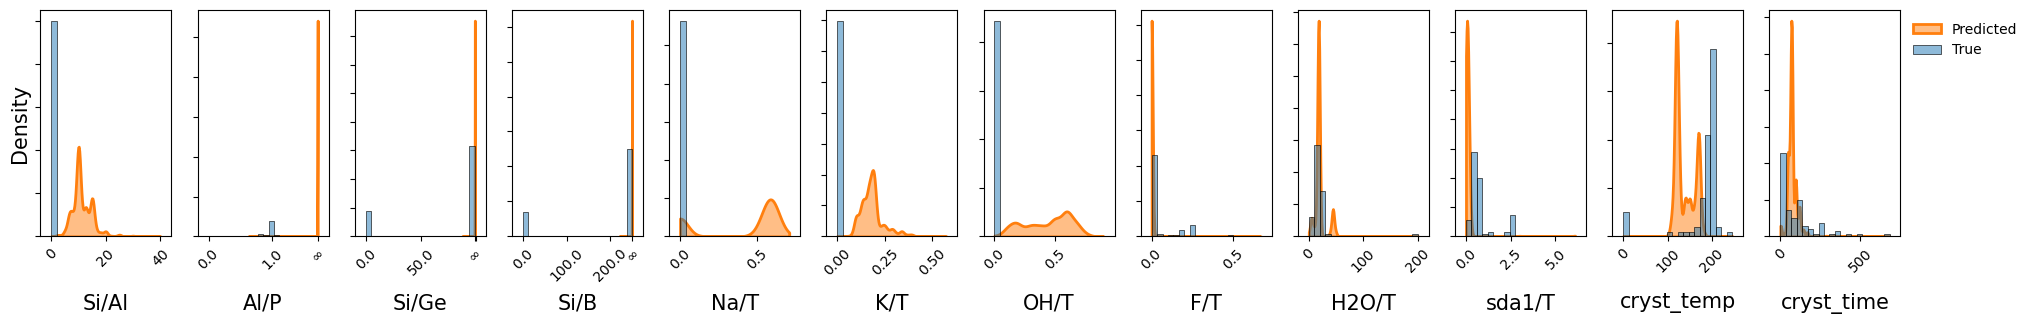

ATO CCCNCCC
MMD: 1.4608898162841797
WSD: 0.04634663722818201


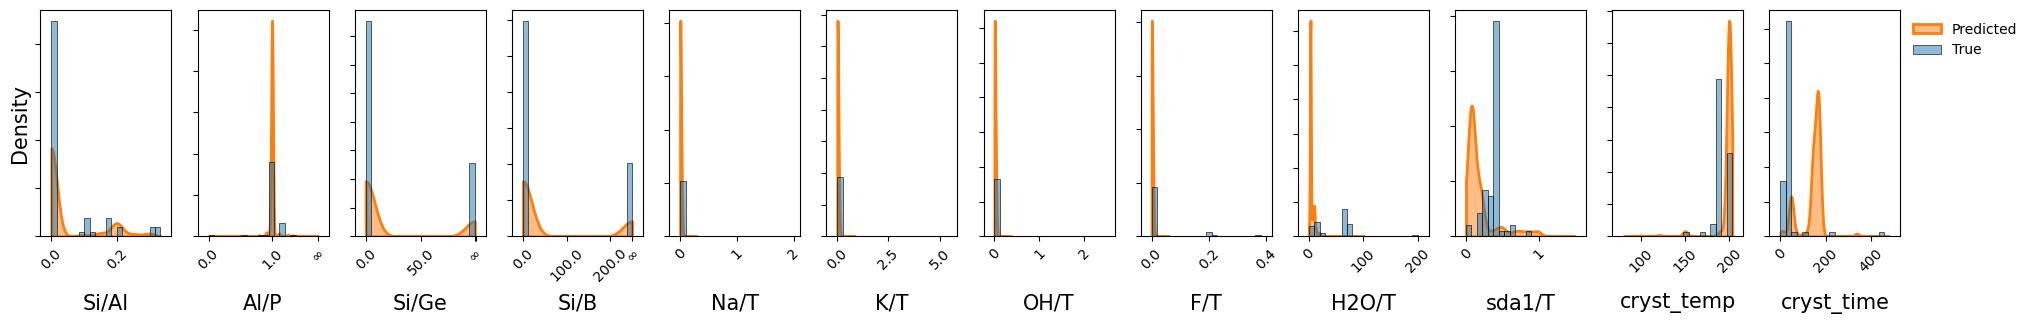

IWR C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.3135442733764648
WSD: 0.31332148817404404


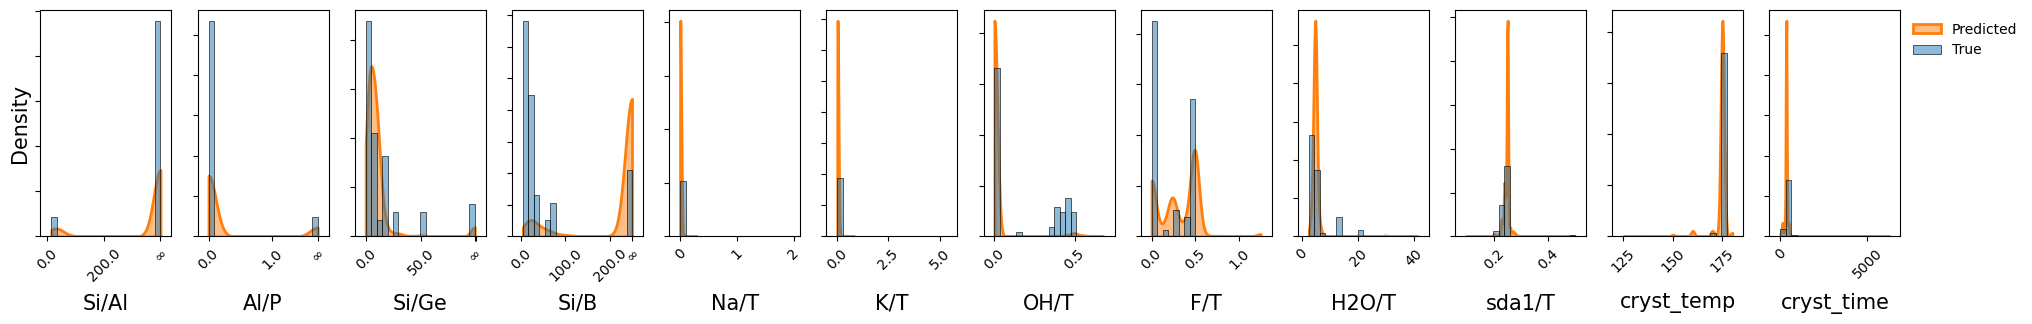

Mean MMD: 1.3314291000366212
Mean WSD: 0.3050421782096064


In [13]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 1.1972627639770508
WSD: 0.2987743059158537


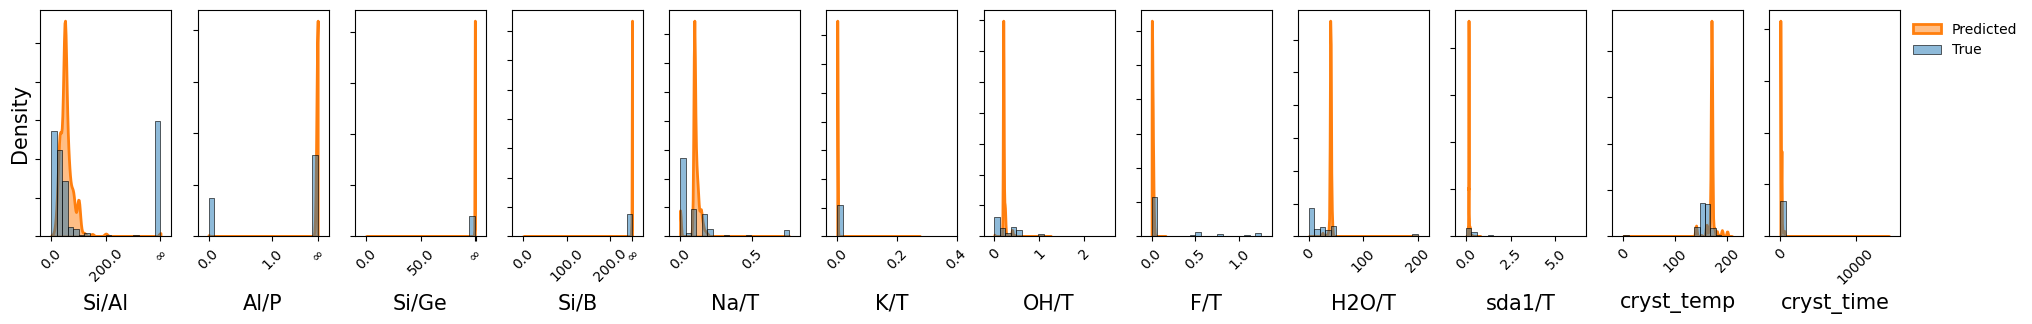

In [12]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')